In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import time

from data_wrangler import get_model_data_for_regression
from models import MODELS


data = get_model_data_for_regression(200000, True)
display(data)

,contest_id,roster_slot_id,player_id,entry_count,usage_ratio,season,double_up,draft_group_id,fifty_fifty,guaranteed,...,projection_value_ratio_mean,projection_value_ratio_max,projection_value_ratio_std,salary_vor,projection_vor,projection_value_ratio_vor,salary_vum,projection_vum,projection_value_ratio_vum,log_usage
1534793,169446477,TE,916467,199,0.005025,2024,f,116004,f,t,...,79.203896,141.153846,44.073899,-1.109850,-0.780732,-0.467485,-3.287530,-2.806864,-1.873078,-2.298853
2930633,172201106,FLEX,593587,228,0.026316,2024,t,119279,f,t,...,111.104785,138.125000,17.487619,1.315764,1.179907,0.398103,-0.714736,-1.268366,-1.147002,-1.579784
509195,167224886,FLEX,1175184,11884,0.022888,2024,f,113472,f,t,...,87.717160,174.112903,31.619012,0.651367,0.841925,0.821965,-2.066188,-1.699454,-1.910433,-1.640394
1248428,168945177,FLEX,1123398,98,0.020408,2024,f,115215,f,t,...,93.424134,129.365079,26.746976,1.048491,0.919533,0.476930,-0.752598,-0.800670,-0.866809,-1.690196
266379,166758629,WR,910852,2972,0.009421,2024,f,109136,f,t,...,88.181975,159.166667,31.181181,-0.554702,-0.312900,0.206323,-3.329725,-3.008928,-2.070200,-2.025891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71679,164121556,WR,607864,2972,0.006729,2024,f,109136,f,t,...,80.231746,159.166667,39.035329,0.504160,0.238827,0.141128,-2.351130,-2.376171,-1.881012,-2.172019
1585294,169563948,DST,339,111,0.486486,2024,f,116267,f,t,...,123.863717,138.709677,10.414792,0.711868,1.099853,1.425469,-0.284747,0.000000,0.000000,-0.312929
1889466,170165647,FLEX,976251,23677,0.000760,2024,f,116896,f,t,...,61.061808,138.680556,40.079173,0.102958,-0.387962,-0.406176,-2.615056,-3.146849,-2.342811,-3.119054
1848020,170114372,FLEX,691055,237,0.004219,2024,f,116872,f,t,...,96.036783,138.680556,27.353613,-1.272959,-1.548279,-1.824034,-3.260867,-3.869264,-3.383016,-2.374748


In [ ]:
def benchmark_regression_training(model, data_train: pd.DataFrame, target, n_repeats: int = 5):
    total_time = 0.0
    for _ in range(n_repeats):
        start_time = time.perf_counter()
        model.fit(data_train, target)
        end_time = time.perf_counter()
        total_time += (end_time - start_time)
    
    avg_time = total_time / n_repeats
    
    return avg_time

def run_benchmark_loop(model):
    data_sizes = [500, 1000, 5000, 10000, 50000, 100000]
    results = []
    
    for size in data_sizes:
        sample_data = data.sample(n=size, random_state=42)
        
        avg_time = benchmark_regression_training(model, sample_data, sample_data['log_usage'], n_repeats=5)
        results.append((size, avg_time))
        print(f"Data Size: {size}, Avg Training Time: {avg_time:.4f} seconds")
    
    return results

In [ ]:

all_results = {}
for model_name, model in MODELS.items():
    if model_name in ['RandomForest']:
        continue  # Only benchmark specified models
    print(f"Benchmarking model: {model_name}")
    results = run_benchmark_loop(model)
    all_results[model_name] = results

Benchmarking model: RandomForest
Data Size: 500, Avg Training Time: 0.8236 seconds
Data Size: 1000, Avg Training Time: 1.7768 seconds
Data Size: 5000, Avg Training Time: 10.3829 seconds
Data Size: 10000, Avg Training Time: 22.7992 seconds


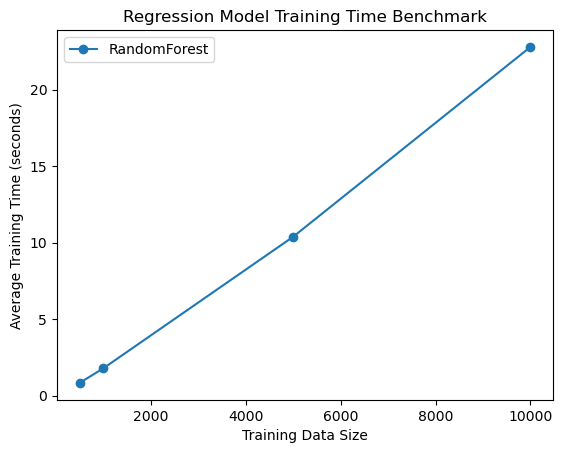

In [18]:
plt.figure()
for model_name, results in all_results.items():
    data_sizes, times = zip(*results)
    plt.plot(data_sizes, times, marker='o', label=model_name)
plt.xlabel('Training Data Size')
plt.ylabel('Average Training Time (seconds)')
plt.title('Regression Model Training Time Benchmark')
plt.legend()
plt.show()

Results:

- SKL is the slowest. About 2 minutes to train on 3M rows
- XGBoost will take about 1 minute
- The others are faster.
- Random forest will take 100 minutes :scream: